<a href="https://colab.research.google.com/github/Avit-hodibu/Seq2Seq/blob/main/Sequence2Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Seq2seq Data**
Data where input has sequence data and output also has sequence data.  

Example: machine translation= you has give sentence "i am male" and you need to translate to nepali " ma purush ho"

**Why seq2seq data is difficult to slove?**
We have 3 challanges:
1. input since it is sentence, it is a variable length
2. the output sentence also be variable length.
3. no gurantee that when you give 3 word sentence input will be of 3 word sentence output.

3 word input can have 300 word output


Prerequiste

seq2seq--> RNN --> sequential data(basically language or sentence, timeseries, bioinformatic)

Many To Many RNN = sequence input give sequence of output.

It can be two type:
1. synchronous: similar length input give similar length output. For eg: POS tagging, NER
2. Asynchronous:squence of input length may not be equal to sqeuence of output length. For example:machine translation, text summary, question-answer,chatbot, speech to text.

In seq2seq model, we are taking about Asynchronous. It came to solve asynchronous architecture.
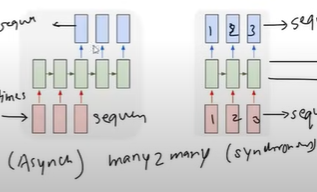

# History of seq2seq Model

Stage 1: Encoder-Decoder

Stage 2: Attention

Stage 3: Transformer

Stage 4: Transfer Learning

Stage 5: LLMs

# Encoder-Decoder Architecture

Architecture has 2 part:
- Encoder = It process input sequence. And it will compress all the information. This information is end to Decoder
- Decoder = Decoder take compress information and one-by-one produce output

Encoder-Decoder work good when we send small sentence. but, when we give long sentence, it lose the meaning.

What was happening is we are giving long sentence the compressor context vector it start to forget starting data. It is having memory loss problem. The translation depend upone what is in the context vector at last. To slove this problem we create attention machanism.


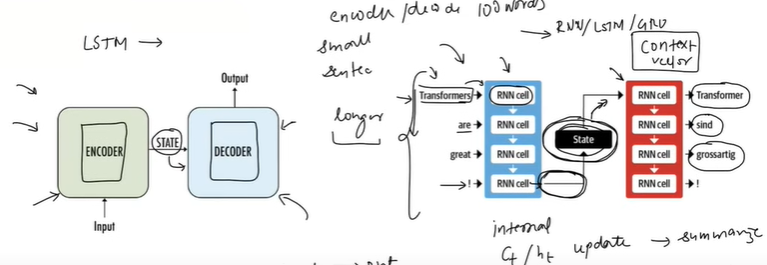



We are taking machine translation as example task.

Encoder is that section where you give inputs. We have to convert english to nepali then we send english here. We give input on token by token basics. Encoder try to understand or summarized the sentence and give the output which is vector(set of vector). This is called context vector(summary of sentence). Context vector is send to decoder. Docoder work is to understand the context vector. After understanding, on a token word by token word basics print out the words and give sentence.


**What's under the hood?**

Inside encoder, we use one LSTM cell. we send one word each timesteps and try to understand. After the final stage we get the c_t and h_t will be the final representation of the sentence which become the context vector. This will send to decoder.

In decoder also there is one LSTM. The LSTM work is to produce output at each timesteps. Intial state of LSTM of decoder will be exactly encoder final state of LSTM. It the final means h_t and c_t from encoder LSTM is will the inital h_t and c_t from decoder. Not only we send context vector output to decoder we also send <START'> which mean decoder will know it need to produce words.Steps by steps, it will produce. The output produce from t=1 is send to t=2 as input and it will produce another output and again it is send to t=3 as input and so on along with internal state. We need to do until we get ouput <END'>. Then we will stop

**Training the Architecture using Backpropagation:**

We tokenized the sentence of input and output.

we need to convert to number both input and output for that we are doing simple OHE. if total unique vocab is 5 then it will be 5 dimension OHE vector. In output we will be have extra 2 vocabulary; <'start>(be the first OHE) and <'end>(be the last OHE) which also get OHE

we will send one by one word vector at timestep to encoder and update h_t and c_t. At final, c_t and h_t as ouput context vector. the value of c_t and h_t is send to decoder.

At first we send start, it will give output vector number by decoder. In decoder layer we add softmax layer that take output of decoder. In this softmax layer there are nodes which will be exactly the number of vocabulary terms of output. For every word we will take 1 unit. The LSTM output through dense layer the softmax will get. Softmax generate the probablity. Output will be the highest proba. and give vector of vector output.

In training, decode we get wrong ouput in timestep t=1. Since we need to send that output back to LSTM for t=2 to get output but it is has already given wrong output at t=1, we still send input to t=2 not the wrong that came from t=1 but the correct one according to the data. This concept is called teacher forcing. We donot want to train with wrong info so, we go and get the correct data and move forward. The training convergence will be fast. We do until we get end from decoder.

As forward prop finish, We will calculate loss. This is like multi-class so we use categorical crossentropy as loss.

L = - E i=1 to number of vocab+2 Yi_true log(Yi_pred)  

we choose crosssponding vector value of each vector.

Since we calculate loss also, we do back propagation.

backpropagation is done with two steps:
1. gradient
2. update parameter

When we calculate the loss it is use for backpropagation. In this process we calculate the gradient of the loss with each of the trainable parameter. These gradient measure in a particular parameter how much it contribute to loss and how to adjust the parameter so loss is minimum.

After calculation of gradient we update parameter. We use optimizer so the adjustment make loss minimum. At what speed it should update for that we use learning rate and it will give new weight. After that we can again repeat this all process with new data. This is how training take place

**Prediction**

Now we need to send english to convert to Nepali.

First of all we tokenized the sentence and send it to encoder word(OHE vector of word) by word bases

On the bases of weights, it create representation. At final, we get h_t and c_t as a context vector. Now decoder will start. <'start> will be send to decoder first. it will create output and send to softmax to calculate the proba and the highest probabilty will be the output and that output will again send as input to decoder . This process repeat. h_t and c_t keep updating through out. At last, the output will be <end'>. Now we will stop the process.

**Improvement on architecture:**

1. use of embedding layers: It create low dimension of vector plus dense and also capture meaning (context) of sentence. We use in encoder as well as decoder.

  we can use pretrain= word2vec/glove or you can train own.
  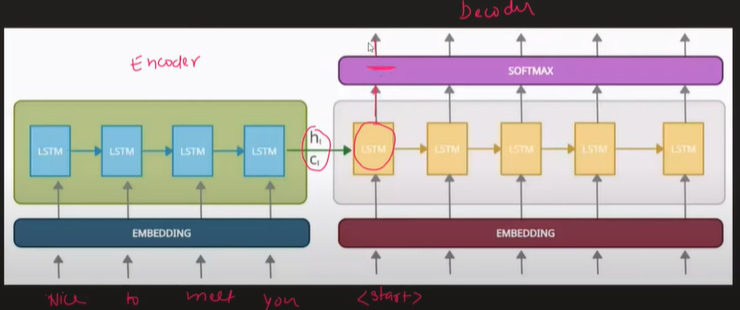

2. Use Deep LSTM: multi-layer LSTM
  - long term dependency can be handle well: we will more number to represent summary.
  - It understand layered representation.
  - DL NN number of parameter increase means learning capablity increase which means better generalization and even if there is variation input it capture better
3. reverse input: It decrease the distance of input and output that means to propogate gradient required less effort. It does not work in every langague.It work on language where initial word has more context

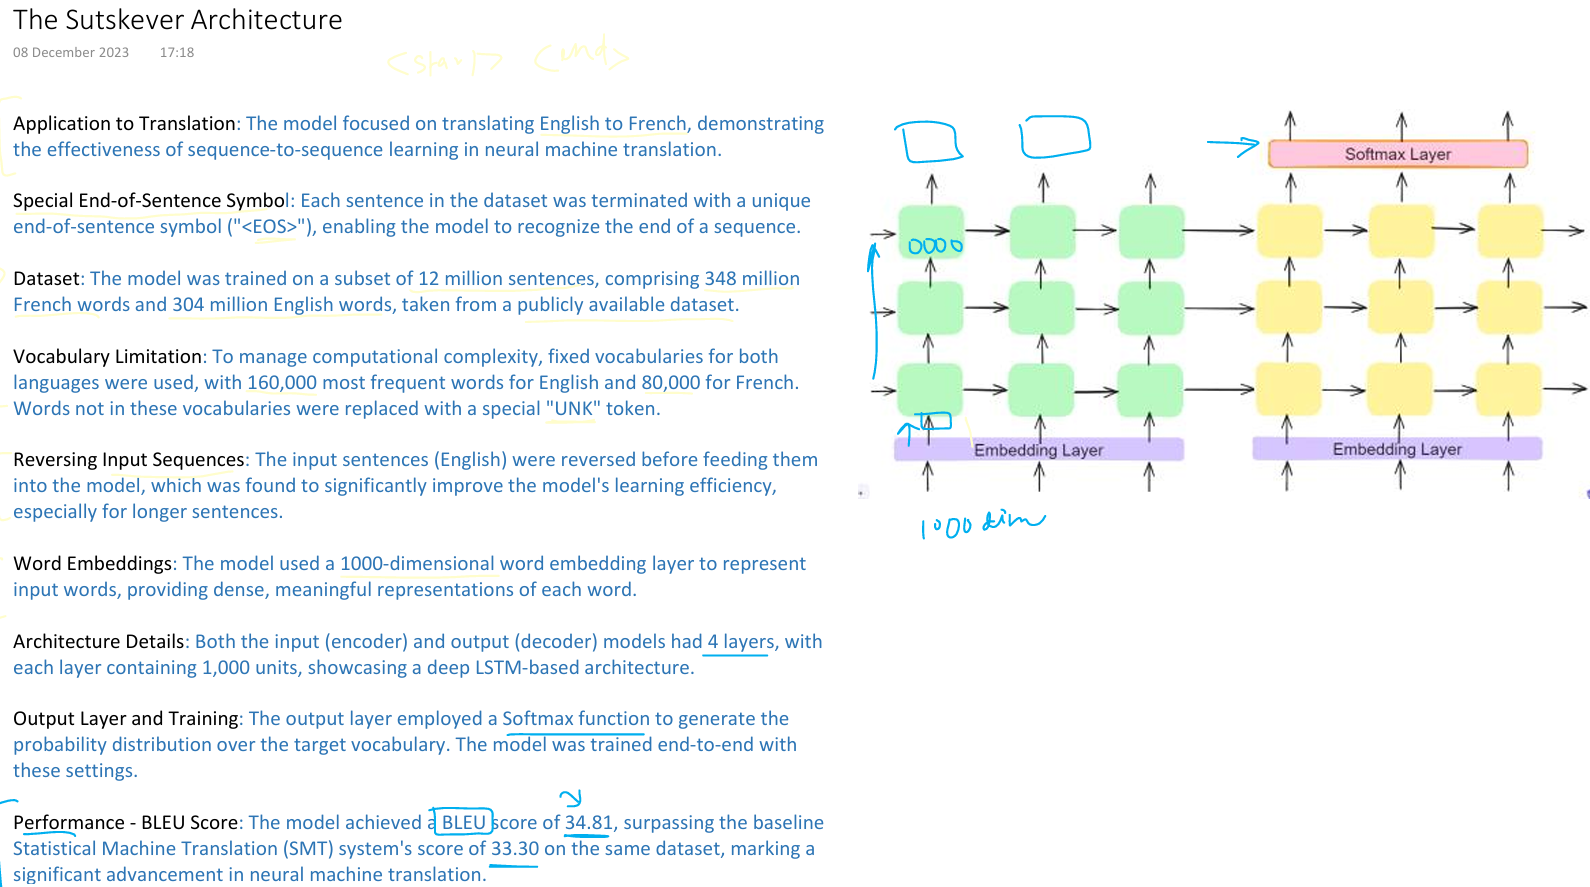

# Attention Mechanism

Representation is depend in context vector so in long sentence it won't able to capture starting word of paragraph or sentence. So, it will not able to convert properly in Encoder-Decoder. In encoder-decoder only after final step context vector give info to decoder about encoder.

But,in attention Mechanism, there is multiple context vector. Any step of the decoder have every information about encoder information. Internal state of encoder is available to communicate with decoder.

For to print single word we have information about every single encoder hiddenstate. But how to know which information is actual to print that word. At this time attention come into picture. Attention figure out which information in encoder is important to print that word from decoder with the help of Attention mechanism.

To print first word it take all hidden state infromtion and figure out using attention machinism and send to context vector and print. and for second also it repeat the process.

 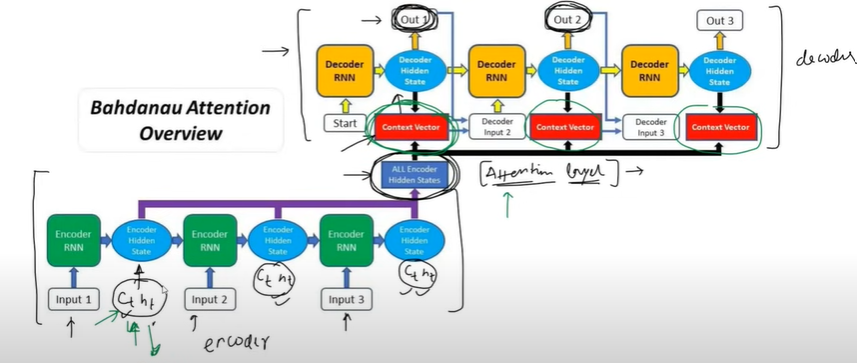

Disadvantage:

- computational complexity increase: we have to calculate each time all the ecoder to find the output each time.

# Transformers

LSTM work sequential order so it was increasing traing time. So, for parrell processing we use Transformers.

In transformers Architecture, they stop using LSTM. They use Attention in both encoder and decoder and along with that they use fully-connected dense layers. It can read simultaneously at once all the word of encoder input which why it is fast.

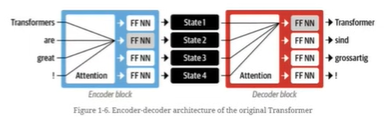

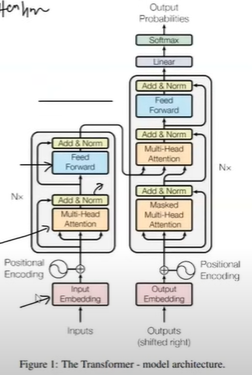

# Transfer Learning

Transformer required:
1. very good hardware
2. time
3. main reason is lot of data

To train from scratch in transformer is hard, So we introduce transfer learning.

Transfer Learning(TL) is a technique in which knowledge learned from a task is re-used in order to boost performance on a realated task.

we do fine tuning.

Why not use early because it was already use in CNN?
- task specificity: people think they cannot use one data of another task to another data
- lack of data in machine translation

ULMfit change it. In pretraining they didnot use machine translation. They use language modelling.
language modelling is a NLP task where we teach model to predict next word.

Why language modeling as pretraining task is successfull?
- rich feature learning: it not only understand basic understanding but also teach semantic and common sense very well.
- huge availablity of data: Till now we need label data as it was supervise model. but they use unsupervise where they donot need label data. So it can use huge data





In ULMfit, they did not use transformer

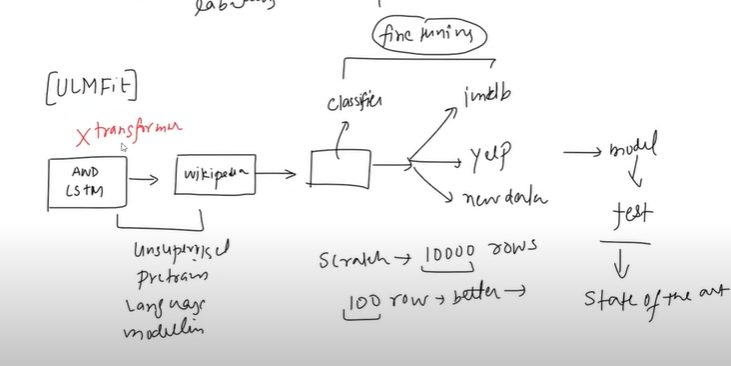

# LLM

Using transformer model was created which has huge dataset. Since it has huge dataset, you can do transfer learning from it.

we can use BERT and GPT use and do fine turning and get great result

Quality of LLMs
- Huge data
- Hardware- it need cluster of GPU (supercomputer)
- Traning time is huge
- cost is huge
- huge energy consumption